### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

### 2. Load Dataset

In [3]:
df = pd.read_csv(r"insurance-1.csv")
df.head()

,Age,Gender,BMI,Childrens,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Visualization

#### 1. Univariate Analysis

In [4]:
# numerical_cols = ['Age','BMI','Childrens','Charges']

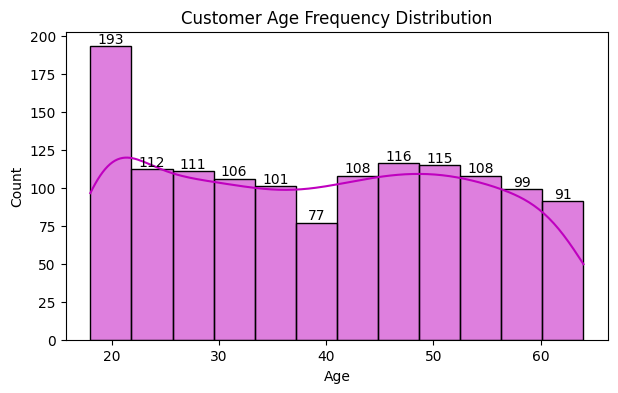

In [5]:
plt.figure(figsize=(7,4))
ax = sns.histplot(df['Age'], kde=True, color="m", edgecolor='black')
for i in ax.containers:
    ax.bar_label(i)
plt.title(f'Customer Age Frequency Distribution')
plt.savefig("Distribution of Age.png",dpi = 400, bbox_inches = "tight")
plt.show()

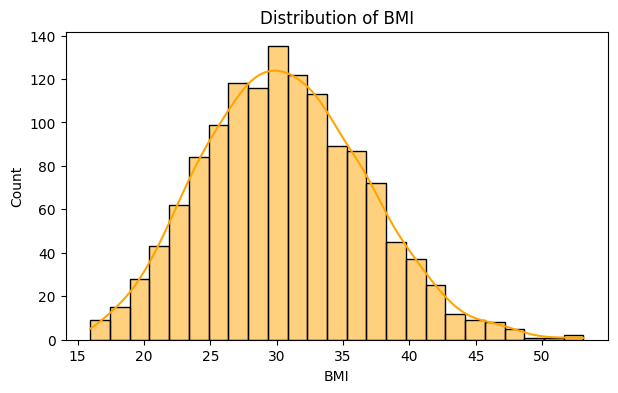

In [6]:
plt.figure(figsize=(7,4))
sns.histplot(df['BMI'], kde=True,color="orange", edgecolor="black")
plt.title(f'Distribution of BMI')
plt.savefig("Distribution of BMI.png",dpi = 400, bbox_inches = "tight")
plt.show()

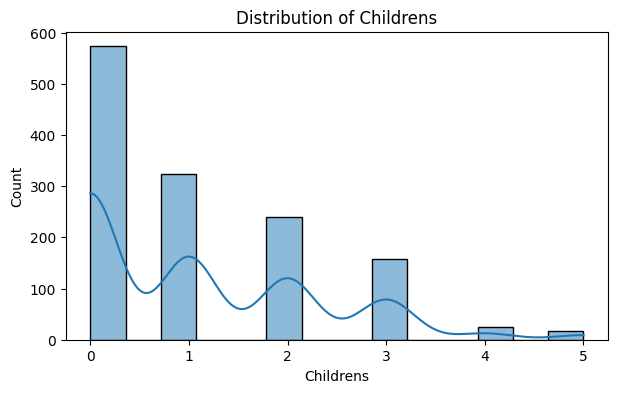

In [7]:
plt.figure(figsize=(7,4))
sns.histplot(df['Childrens'], kde=True, palette="Set3", edgecolor="black")
plt.title(f'Distribution of Childrens')
plt.savefig("Distribution of Childrens.png",dpi = 400, bbox_inches = "tight")
plt.show()

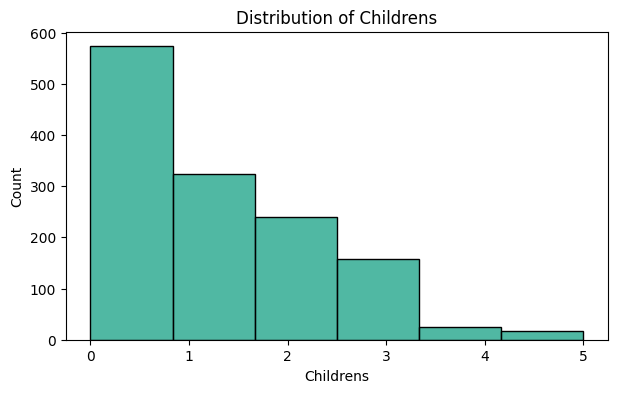

In [8]:
plt.figure(figsize=(7,4))
sns.histplot(df['Childrens'], bins=6, color="#16A085", edgecolor="black")
plt.title('Distribution of Childrens')
plt.savefig("Distribution_of_Childrens.png", dpi=400, bbox_inches="tight")
plt.show()

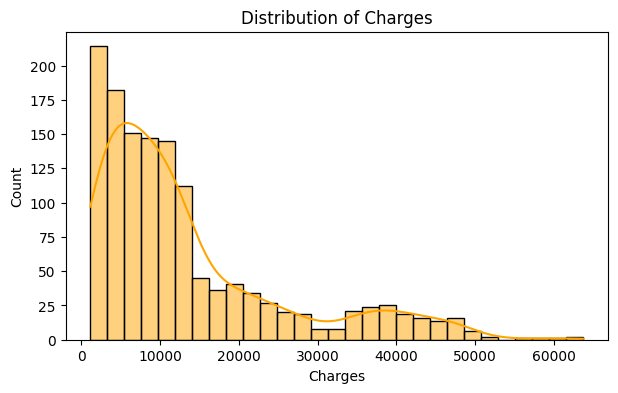

In [9]:
plt.figure(figsize=(7,4))
sns.histplot(df['Charges'], kde=True, color="Orange", edgecolor="black")
plt.title(f'Distribution of Charges')
plt.savefig("Distribution of Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

In [10]:
# categorical_cols = ['Gender','Smoker','Region'] 

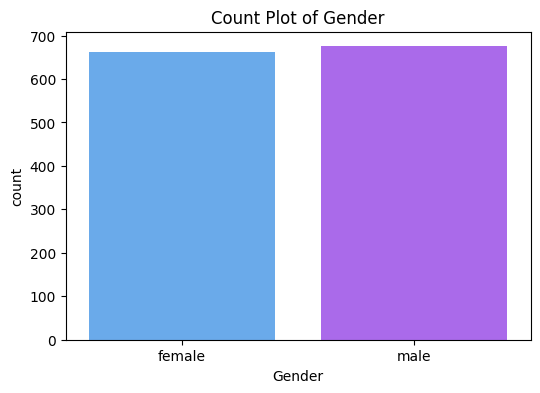

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Gender'], palette='cool')
plt.title(f'Count Plot of Gender')
plt.savefig("Count plot of Gender.png",dpi = 400, bbox_inches = "tight")
plt.show()

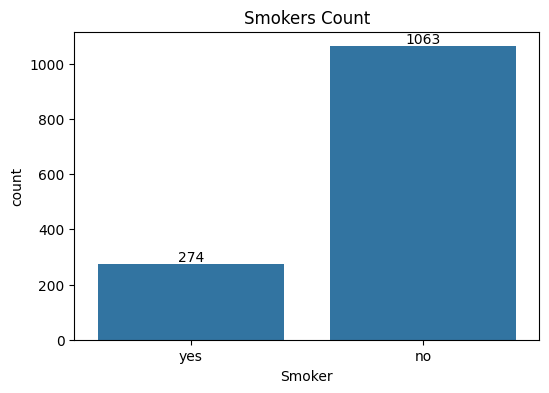

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['Smoker'])
for i in ax.containers:
    ax.bar_label(i)
plt.title(f'Smokers Count')
# plt.savefig("Smokers Count.png",dpi = 400, bbox_inches = "tight")
plt.show()

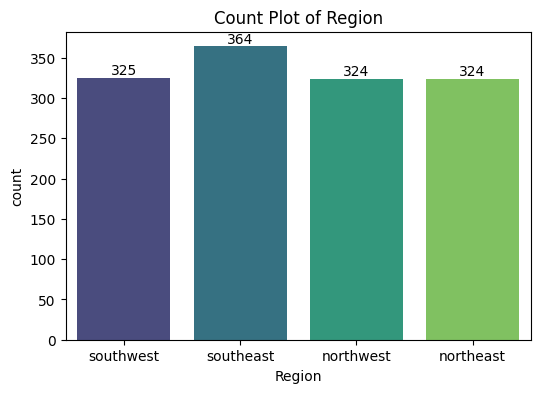

In [13]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['Region'], palette="viridis")
for i in ax.containers:
    ax.bar_label(i)
plt.title(f'Count Plot of Region')
# plt.savefig("Count plot of Region.png",dpi = 400, bbox_inches = "tight")
plt.show()

### 2. Bivariate analysis

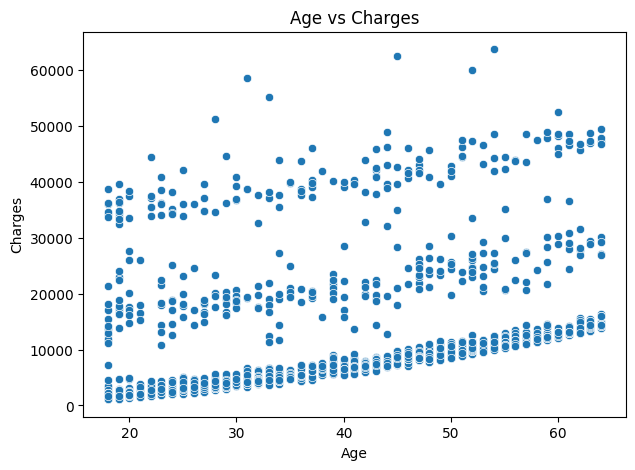

In [14]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Charges', data=df)
plt.title("Age vs Charges")
plt.savefig("Age vs Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

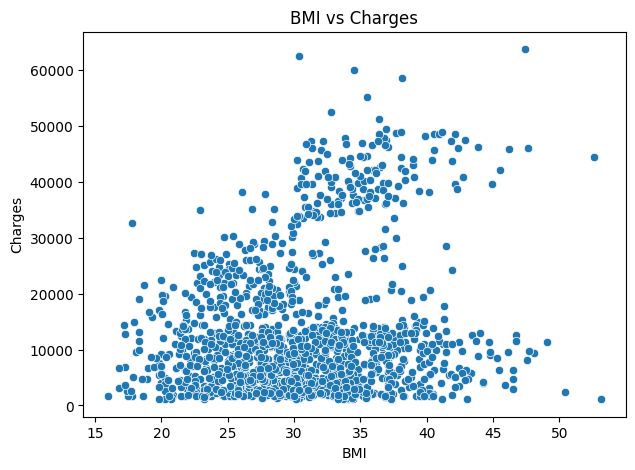

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='BMI', y='Charges', data=df)
plt.title("BMI vs Charges")
plt.savefig("BMI vs Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

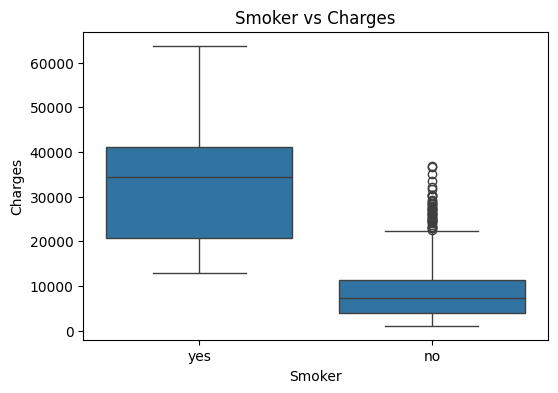

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Smoker', y='Charges', data=df)
plt.title("Smoker vs Charges")
plt.savefig("Smoker vs Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

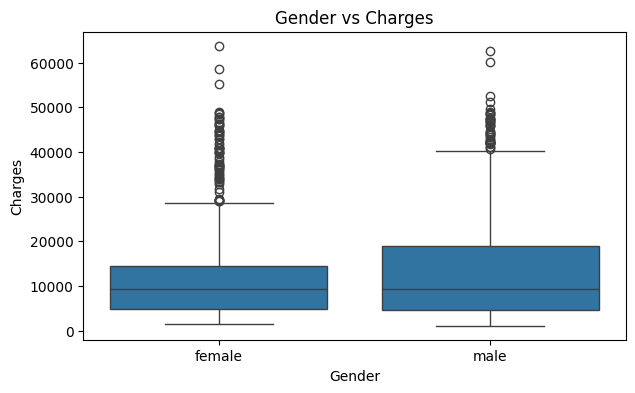

In [17]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Gender', y='Charges', data=df)
plt.title("Gender vs Charges")
plt.savefig("Gender vs Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

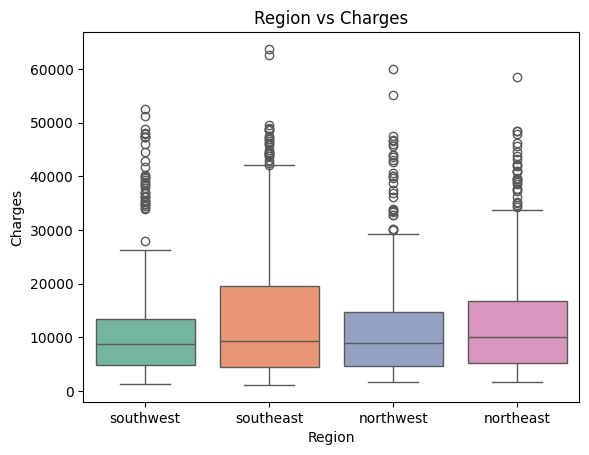

In [18]:
sns.boxplot(x='Region', y='Charges', data=df, palette="Set2")
plt.title("Region vs Charges")
plt.savefig("Region vs Charges.png",dpi = 400, bbox_inches = "tight")
plt.show()

### Numerical Column Outliers 

In [19]:
# Outlier detection using IQR (count only)
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    lower_outliers = df[df[col] < lower].shape[0]
    upper_outliers = df[df[col] > upper].shape[0]
    total_outliers = lower_outliers + upper_outliers
    
    print(f"\nColumn: {col}")
    print(f"  Lower outliers: {lower_outliers}")
    print(f"  Upper outliers: {upper_outliers}")
    print(f"  Total outliers: {total_outliers}")
    # Percentages
    total_rows = df.shape[0]
    total_pct = round((total_outliers / total_rows) * 100, 2)
    print(f" Percentage of outliers: {total_pct}%")
    
# Apply to numerical columns
num_cols = ['Age', 'BMI', 'Charges']   
for col in num_cols:
    count_outliers(col)
    


Column: Age
  Lower outliers: 0
  Upper outliers: 0
  Total outliers: 0
 Percentage of outliers: 0.0%

Column: BMI
  Lower outliers: 0
  Upper outliers: 9
  Total outliers: 9
 Percentage of outliers: 0.67%

Column: Charges
  Lower outliers: 0
  Upper outliers: 139
  Total outliers: 139
 Percentage of outliers: 10.4%


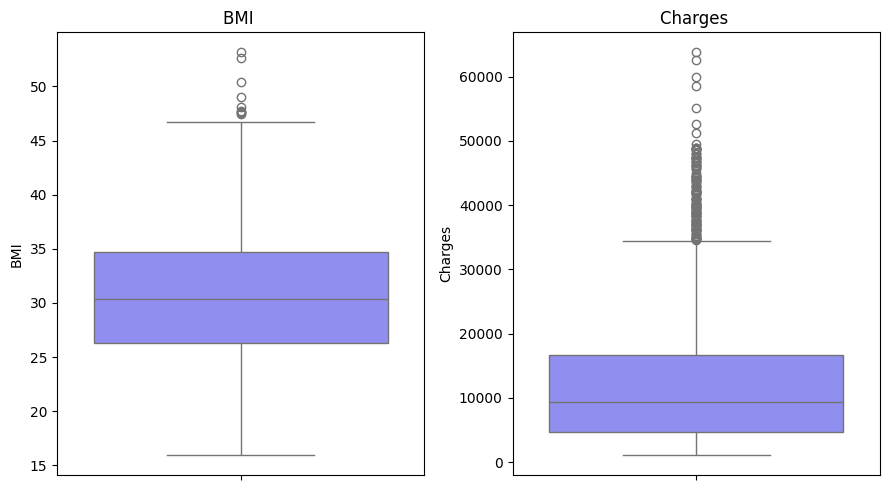

In [20]:
num_cols = ['BMI', 'Charges']  

plt.figure(figsize=(9, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)    
    sns.boxplot(y=df[col], palette="cool")
    plt.title(f"{col} ")
    plt.xlabel("")   

plt.tight_layout()
plt.savefig("Outliers on Numerical columns...png",dpi = 400, bbox_inches = "tight")
plt.show()

### 3. Correlation Heatmap

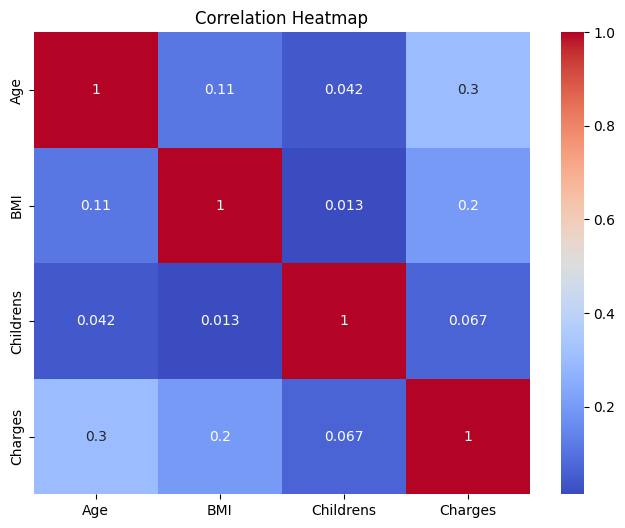

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

###  Correlation Insights
- Smoking has the strongest positive correlation with charges.
- Age has moderate correlation with charges.
- Sex and region contribute very little to the prediction.

### Key Insights-
- Smoker status is the strongest factor affecting charges — smokers pay drastically higher charges.
- Age and BMI also show strong positive relationships with charges.
- People with obesity (BMI > 30) pay significantly more.
- Region and sex have minimal effect on medical charges.
- Number of children has low correlation, but slight increase in charges.

### Recommendations 
- Introduce special premium plans for smokers or incentives for quitting — reduces claim costs.
- Design age-wise premium brackets, since charges increase steadily with age.
- Launch obesity-management wellness programs — high BMI leads to higher charges.
- Region-specific pricing is unnecessary → no major impact found.

### Final Insights & Recommendations

1. Smoking has the largest impact on medical charges.
2. Higher BMI (obesity) significantly increases the cost.
3. Age is positively correlated with charges.
4. Region and gender have minimal effect on charges.
5. Pricing models should focus on age, BMI, and smoker status.

### Business Recommendations
- Introduce separate premium segments for smokers.
- Launch wellness and obesity reduction programs.
- Provide preventive healthcare plans for older customers.